In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

import matplotlib.dates as mdates

## Price correlation of non-stablecoins

In [2]:
files_to_use = ["coin_Aave_conv.csv",
                "coin_BinanceCoin_conv.csv",
                "coin_Bitcoin_conv.csv",
                "coin_Cardano_conv.csv",
                "coin_ChainLink_conv.csv",
                "coin_Cosmos_conv.csv",
                "coin_CryptocomCoin_conv.csv",
                "coin_Dogecoin_conv.csv",
                "coin_EOS_conv.csv",
                "coin_Ethereum_conv.csv",
                "coin_Iota_conv.csv",
                "coin_Litecoin_conv.csv",
                "coin_Monero_conv.csv",
                "coin_NEM_conv.csv",
                "coin_Polkadot_conv.csv",
                "coin_Solana_conv.csv",
                "coin_Stellar_conv.csv",
                "coin_Tether_conv.csv",
                "coin_Tron_conv.csv",
                "coin_Uniswap_conv.csv",
                #"coin_USDCoin_conv.csv",
                "coin_WrappedBitcoin_conv.csv",
                "coin_XRP_conv.csv"
               ]

cols_to_use = []
for ind, file_name in enumerate(files_to_use):
    currency_name = file_name.split("_")[1]
    if ind == 0:
        df = pd.read_csv("../../processed/resources/"+file_name, usecols=["Date", "Spread"], parse_dates=["Date"])
        df.columns = ["Date", currency_name]
    else:
        temp_df = pd.read_csv("../../processed/resources/"+file_name, usecols=["Date", "Spread"], parse_dates=["Date"])
        temp_df.columns = ["Date", currency_name]
        df = pd.merge(df, temp_df, on="Date")
    cols_to_use.append(currency_name)
df

,Date,Aave,BinanceCoin,Bitcoin,Cardano,ChainLink,Cosmos,CryptocomCoin,Dogecoin,EOS,...,Monero,NEM,Polkadot,Solana,Stellar,Tether,Tron,Uniswap,WrappedBitcoin,XRP
0,2020-10-05,5.324459,1.130854,158.907687,0.002394,0.378222,0.203093,0.001929,0.000062,0.040877,...,9.441250,0.008390,0.113296,0.195303,0.001504,0.001392,0.000774,0.374952,158.257153,0.006600
1,2020-10-06,12.667692,1.669673,268.687256,0.006623,0.950228,0.679913,0.003814,0.000054,0.414096,...,8.126471,0.007922,0.536321,0.507508,0.002997,0.000507,0.001156,0.695871,252.321017,0.016419
2,2020-10-07,6.437624,0.927688,118.001072,0.004429,0.546109,0.359925,0.001340,0.000047,0.083652,...,10.010693,0.004621,0.257432,0.296177,0.002126,0.000838,0.000630,0.525800,109.583215,0.009497
3,2020-10-08,8.206454,1.212058,383.130932,0.005900,1.107931,0.475786,0.005210,0.000071,0.099799,...,4.868048,0.004731,0.495369,0.402084,0.002718,0.000980,0.000814,0.834492,382.737872,0.009907
4,2020-10-09,4.277757,1.013998,255.821076,0.007310,1.098743,0.312135,0.003378,0.000072,0.073487,...,9.424787,0.002569,0.331919,0.308178,0.003104,0.000565,0.000881,0.559873,257.019204,0.006699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2021-02-23,112.934330,78.124382,8914.339488,0.309560,10.351760,7.921977,0.082151,0.011358,1.466289,...,53.726472,0.287437,10.956526,4.143477,0.144493,0.003130,0.015623,9.209374,8890.788156,0.191687
142,2021-02-24,57.971453,65.563481,4076.638533,0.172249,4.533276,2.450254,0.032818,0.013657,0.431658,...,26.207991,0.067529,4.777124,3.284822,0.062420,0.001344,0.006297,4.136475,4013.104325,0.044611
143,2021-02-25,47.206414,30.819178,4855.113963,0.154746,3.960870,2.792597,0.022080,0.007939,0.446349,...,20.734861,0.046576,4.019908,3.899531,0.044517,0.001413,0.004707,3.566539,4622.786062,0.053414
144,2021-02-26,45.711880,28.444251,3915.943146,0.294898,3.187289,2.684623,0.015097,0.003764,0.331268,...,23.231215,0.125325,5.393741,2.363564,0.043261,0.001653,0.004176,4.016430,3750.208980,0.034881


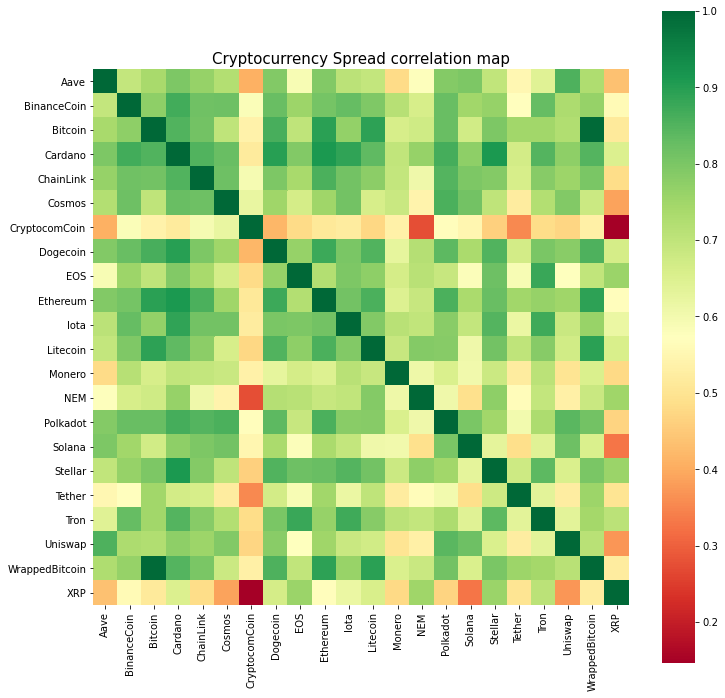

In [4]:
temp_df = df[cols_to_use]
corrmat = temp_df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat,
            vmax=1.,
            cmap="RdYlGn",
            #robust=True,
            #center=0.5,
            square=True)
plt.title("Cryptocurrency Spread correlation map", fontsize=15)
plt.show()